# Example 1

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACVoltageSource, Capacitor
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.SimpleCircuit.DiagramSolution import complex_solution
from CircuitCalculator.SimpleAnalysis.PointerDiagram import VoltagePointerDiagram
from CircuitCalculator.SimpleAnalysis.TimeSeries import VoltageTimeSeriesPlot, CurrentTimeSeriesPlot
from CircuitCalculator.Circuit.solution import TimeDomainSolution

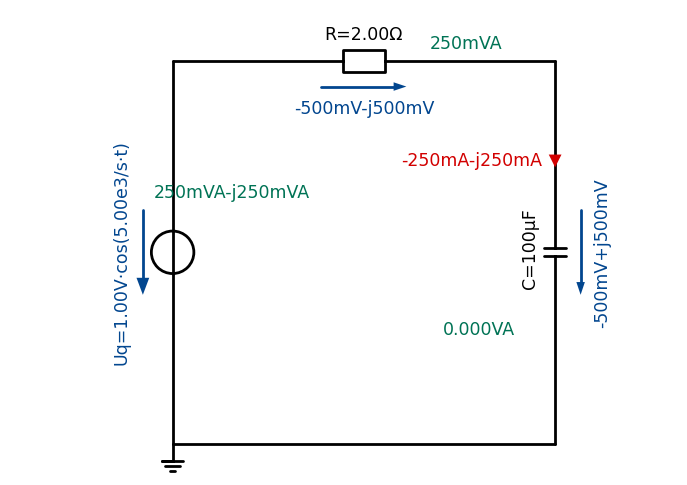

In [2]:
with Schematic(unit=9) as schematic:
    schematic += ACVoltageSource(V=1, w=5000, phi=0.1, name='Uq')
    schematic += Resistor(R=2, name='R').right()
    schematic += Capacitor(C=1e-4, name='C').down()
    schematic += Line().left()
    schematic += Ground()
    schematic_solution = complex_solution(schematic=schematic, w=5000)
    schematic += schematic_solution.draw_voltage('R')
    schematic += schematic_solution.draw_voltage('C')
    schematic += schematic_solution.draw_current('C')
    schematic += schematic_solution.draw_power('R')
    schematic += schematic_solution.draw_power('Uq')
    schematic += schematic_solution.draw_power('C')

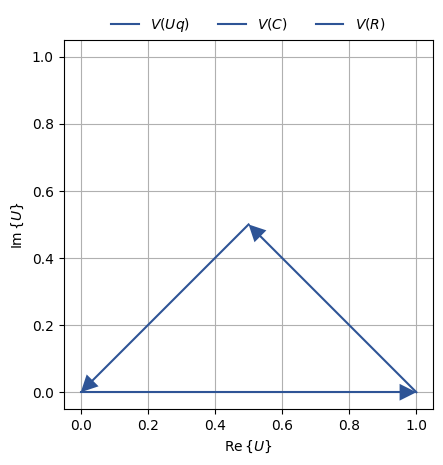

In [3]:
with VoltagePointerDiagram(solution=schematic_solution.solution) as pointer_diagram:
    pointer_diagram.add_voltage_pointer('Uq')
    pointer_diagram.add_voltage_pointer('C', origin='Uq')
    pointer_diagram.add_voltage_pointer('R', origin='C')

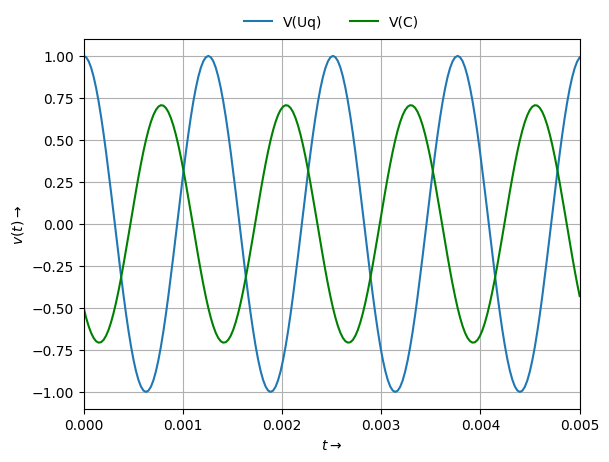

In [4]:
with VoltageTimeSeriesPlot(solution=TimeDomainSolution(circuit_translator(schematic)), tmax=0.005) as time_series_plot:
    time_series_plot.add_voltage('Uq')
    time_series_plot.add_voltage('C', color='green')

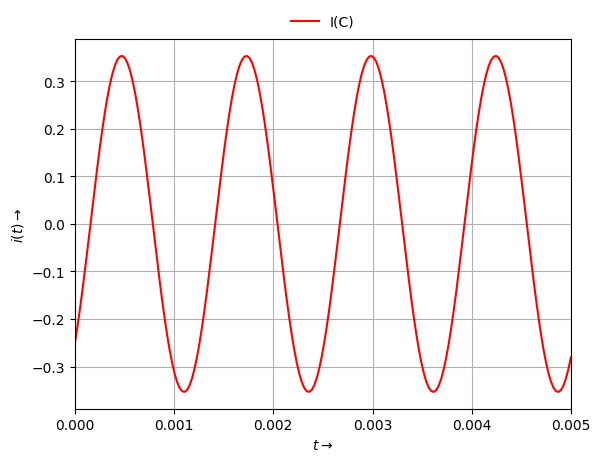

In [5]:
with CurrentTimeSeriesPlot(solution=TimeDomainSolution(circuit_translator(schematic)), tmax=0.005) as time_series_plot:
    time_series_plot.add_current('C', color='red')